## Import All the Required Libraries

In [1]:
import os
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Concatenate, LeakyReLU, Input, Conv2D, MaxPooling2D

In [2]:
import pandas as pd
# Specify the file paths for the training, validation, and testing CSV files
train_csv_file = '/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification/train_data.csv'  # Replace with the path to your training CSV file
val_csv_file = '/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification/val_data.csv'  # Replace with the path to your validation CSV file
test_csv_file ='/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification/testing_data.csv'  # Replace with the path to your testing CSV file

In [3]:
# Read the training CSV file into a DataFrame
train_df = pd.read_csv(train_csv_file)

# Read the validation CSV file into a DataFrame
val_df = pd.read_csv(val_csv_file)

# Read the testing CSV file into a DataFrame
test_df = pd.read_csv(test_csv_file)

# Create ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)


# Create data generators
train_generator = datagen.flow_from_dataframe(
    train_df,
    directory='/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img',    x_col='Filename',
    y_col='AQI_Class',
    target_size=(224, 224),
    class_mode='categorical'
)

val_generator = datagen.flow_from_dataframe(
    val_df,
    directory='/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img',                             # Change the directory to your downloaded dataset path
    x_col='Filename',
    y_col='AQI_Class',
    target_size=(224, 224),
    class_mode='categorical'
)

test_generator = datagen.flow_from_dataframe(
    test_df,
    directory='/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img',                             # Change the directory to your downloaded dataset path
    x_col='Filename',
    y_col='AQI_Class',
    target_size=(224, 224),
    class_mode='categorical',
    shuffle=False
)

Found 7833 validated image filenames belonging to 6 classes.
Found 1959 validated image filenames belonging to 6 classes.
Found 2448 validated image filenames belonging to 6 classes.


In [4]:
train_df.head(10)

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Tamil Nadu,TN_UnFSG_2023-03-02-08.30-1.jpg,2023,3,2,8:30,119,69.00,106.00,8.00,358.00,22.0,26.00,c_Unhealthy_for_Sensitive_Groups
1,Bengaluru,BENGR_Mod_2023-02-24-08.30-1-166.jpg,2023,2,24,8:30,68,32.00,61.00,26.00,228.00,5.0,21.00,b_Moderate
2,"Biratnagar, Nepal",BIR_UNFSG_VF_2023-02-03-15.00-2-24.jpg,2023,2,3,15:00,141,47.96,68.92,65.57,0.41,2.8,2.51,c_Unhealthy_for_Sensitive_Groups
3,Mumbai,MH_UnFSG_2023-03-10-16.00-1-76.jpg,2023,3,10,16:00,141,72.00,108.00,NaN,NaN,NaN,63.00,c_Unhealthy_for_Sensitive_Groups
4,"ITO, Delhi",DEL_SEV_2023-02-07-14.00-2-8.jpg,2023,2,7,14:00,449,337.00,198.00,23.00,24.00,13.0,57.00,f_Severe
5,Bengaluru,BENGR_Good_2023-02-26-08.30-1-236.jpg,2023,2,26,8:30,48,24.00,47.00,17.00,210.00,13.0,14.00,a_Good
6,"Biratnagar, Nepal",BIR_UNFSG_VF_2023-02-03-15.00-2-48.jpg,2023,2,3,15:00,141,47.96,68.92,65.57,0.41,2.8,2.51,c_Unhealthy_for_Sensitive_Groups
7,Bengaluru,BENGR_Mod_2023-02-21-08.30-1-526.jpg,2023,2,21,8:30,56,27.00,53.00,27.00,265.00,19.0,16.00,b_Moderate
8,Mumbai,MH_UnFSG_2023-02-17-19.00-2-37.jpg,2023,2,17,19:00,145,86.00,122.00,82.00,0.00,NaN,NaN,c_Unhealthy_for_Sensitive_Groups
9,Mumbai,MH_UH_2023-02-11-03.30-2-49.jpg,2023,2,11,15:30,154,66.20,93.75,91.00,20.00,NaN,98.00,d_Unhealthy


# I. 1st Model- CNN 
## For Making Predictions on Images

In [5]:
# Define the model architecture
model = Sequential()

# 1st Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 2nd Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 3rd Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flattening Layer
model.add(Flatten())

# FCC 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# FCC 2
model.add(Dense(128, activation='relu'))

#
model.add(Dense(6, activation='softmax'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,195,302 (73.22 MB)

 Trainable params: 19,195,302 (73.22 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model
model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'mean_squared_error', metrics = ['accuracy','precision','recall'])

In [7]:
train_images = '/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img'  # Your training images
train_labels = train_df  # Your training labels
val_images = '/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img'  # Your validation images
val_labels = val_df  # Your validation labels

In [8]:
# Train the model
history = model.fit(train_generator, epochs=3, validation_data=val_generator)

Epoch 1/3


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733259484.113874      67 service.cc:145] XLA service 0x7c0c4c010bf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733259484.113926      67 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733259484.113930      67 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/245 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.0938 - loss: 0.1401 - precision: 0.0000e+00 - recall: 0.0000e+00  

I0000 00:00:1733259498.533181      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


245/245 ━━━━━━━━━━━━━━━━━━━━ 83s 266ms/step - accuracy: 0.2581 - loss: 0.1340 - precision: 0.3276 - recall: 0.0115 - val_accuracy: 0.4446 - val_loss: 0.1108 - val_precision: 0.6945 - val_recall: 0.1485
Epoch 2/3
245/245 ━━━━━━━━━━━━━━━━━━━━ 30s 120ms/step - accuracy: 0.4683 - loss: 0.1109 - precision: 0.6321 - recall: 0.1933 - val_accuracy: 0.5773 - val_loss: 0.0906 - val_precision: 0.7385 - val_recall: 0.3951
Epoch 3/3
245/245 ━━━━━━━━━━━━━━━━━━━━ 31s 124ms/step - accuracy: 0.5453 - loss: 0.0970 - precision: 0.6947 - recall: 0.3272 - val_accuracy: 0.5967 - val_loss: 0.0876 - val_precision: 0.7266 - val_recall: 0.3880


In [9]:
# Predict classes for the testing set
test_generator.reset()
cnn_y_pred = model.predict(test_generator)
cnn_y_pred_classes = cnn_y_pred.argmax(axis=1)
cnn_y_true = test_generator.classes

# Calculate metrics
report = classification_report(cnn_y_true, cnn_y_pred_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", report)

# Calculate confusion matrix
cm = confusion_matrix(cnn_y_true, cnn_y_pred_classes)
print("Confusion Matrix:\n", cm)

77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step
Classification Report:
                                   precision    recall  f1-score   support

                          a_Good       0.61      0.42      0.50       310
                      b_Moderate       0.59      0.54      0.57       314
c_Unhealthy_for_Sensitive_Groups       0.55      0.54      0.54       569
                     d_Unhealthy       0.54      0.78      0.64       526
                e_Very_Unhealthy       0.80      0.58      0.68       440
                        f_Severe       0.66      0.69      0.68       289

                        accuracy                           0.60      2448
                       macro avg       0.62      0.59      0.60      2448
                    weighted avg       0.62      0.60      0.60      2448

Confusion Matrix:
 [[130  68  46  51   7   8]
 [ 41 171  41  44   3  14]
 [ 29  39 306 139  13  43]
 [ 11   5  81 410   2  17]
 [  1   3  55 105 257  19]
 [  2   5  29  15  39 199]]


# II. Second Classification Model Using Random Forest

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
def preprocess_data(df, label_encoder=None, scaler=None):
   
    print(df.shape)
    # Drop irrelevant columns
    df.drop(['Filename'], axis=1, inplace=True)  # Drop Filename as it's irrelevant for modeling
    # df.drop(['Location'], axis=1, inplace=True)
     
    
    print(df.columns)
    # Encode categorical features
    if label_encoder is None:
        label_encoder = {}
        for col in ['Location', 'AQI_Class']:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoder[col] = le
    else:
        for col in ['Location', 'AQI_Class']:
            df[col] = label_encoder[col].transform(df[col])
    
    # Parse 'Hour' column into numeric format (optional, can drop instead)
    df['Hour'] = df['Hour'].str.split(':').str[0].astype(int)

    # Handle missing values
    df.fillna(df.median(), inplace=True)
    
    # Select features and target
    X = df.drop('AQI_Class', axis=1)  # Features
    y = df['AQI_Class']  # Target
    
    # Scale numerical features
    if scaler is None:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    else:
        X = scaler.transform(X)
    
    return X, y, label_encoder, scaler

In [12]:
# Read the training CSV file into a DataFrame
train_df = pd.read_csv(train_csv_file)

# Read the validation CSV file into a DataFrame
val_df = pd.read_csv(val_csv_file)

# Read the testing CSV file into a DataFrame
test_df = pd.read_csv(test_csv_file)


# Preprocess train, validation, and test data
X_train, y_train, le, scaler = preprocess_data(train_df)
X_val, y_val, _, _ = preprocess_data(val_df, le, scaler)
X_test, y_test, _, _ = preprocess_data(test_df, le, scaler)

print(X_test.shape)
print(y_test.shape)

(7833, 14)
Index(['Location', 'Year', 'Month', 'Day', 'Hour', 'AQI', 'PM2.5', 'PM10',
       'O3', 'CO', 'SO2', 'NO2', 'AQI_Class'],
      dtype='object')
(1959, 14)
Index(['Location', 'Year', 'Month', 'Day', 'Hour', 'AQI', 'PM2.5', 'PM10',
       'O3', 'CO', 'SO2', 'NO2', 'AQI_Class'],
      dtype='object')
(2448, 14)
Index(['Location', 'Year', 'Month', 'Day', 'Hour', 'AQI', 'PM2.5', 'PM10',
       'O3', 'CO', 'SO2', 'NO2', 'AQI_Class'],
      dtype='object')
(2448, 12)
(2448,)


In [13]:
# Train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

# Validate the model
y_val_pred = clf.predict(X_val)

# Test the model
y_test_pred = clf.predict(X_test)

print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       252
           2       1.00      1.00      1.00       458
           3       1.00      1.00      1.00       420
           4       1.00      1.00      1.00       351
           5       1.00      1.00      1.00       231

    accuracy                           1.00      1959
   macro avg       1.00      1.00      1.00      1959
weighted avg       1.00      1.00      1.00      1959

Validation Confusion Matrix:
 [[247   0   0   0   0   0]
 [  0 252   0   0   0   0]
 [  0   0 458   0   0   0]
 [  0   0   0 420   0   0]
 [  0   0   0   0 351   0]
 [  0   0   0   0   0 231]]
Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00       314
           2       1.00      1.00 

# III. FINAL ENSEMBLE MODEL

In [14]:
import numpy as np

# Get CNN probabilities
cnn_probs = cnn_y_pred
print("cnn shape is",cnn_probs.shape)

# Get tabular probabilities
tabular_probs = clf.predict_proba(X_test)
print("Random Forest shape",tabular_probs.shape)

# Ensemble (weighted average)
# ensemble_probs = (0.5 * cnn_probs + 0.5 * tabular_probs)
ensemble_probs = (0.6 * cnn_probs + 0.4 * tabular_probs)

# Final predictions
ensemble_preds = np.argmax(ensemble_probs, axis=1)

# Evaluate ensemble performance
from sklearn.metrics import classification_report
print("Ensemble Classification Report:\n", classification_report(y_test, ensemble_preds))
print("Ensemble Confusion Matrix:\n", confusion_matrix(y_test, ensemble_preds))

cnn shape is (2448, 6)
Random Forest shape (2448, 6)
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       310
           1       0.94      0.97      0.96       314
           2       0.98      0.97      0.98       569
           3       0.95      1.00      0.97       526
           4       0.99      0.95      0.97       440
           5       0.98      0.99      0.98       289

    accuracy                           0.97      2448
   macro avg       0.97      0.97      0.97      2448
weighted avg       0.97      0.97      0.97      2448

Ensemble Confusion Matrix:
 [[298   6   3   2   1   0]
 [  0 304   6   3   0   1]
 [  0  12 552   2   2   1]
 [  0   0   0 526   0   0]
 [  0   0   0  19 418   3]
 [  0   0   0   2   2 285]]


# IV. Data Visualisation

## 1. F1 Score

In [15]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, log_loss

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, ensemble_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate F1 score (use weighted average to account for class imbalances)
f1_scores = f1_score(y_test, ensemble_preds, average=None)  # 'micro', 'macro', or 'weighted' can be used

classes = np.unique(train_df['AQI_Class'])  # Get class names

# Print F1 score for each class
print("F1 Score per Class:")
for cls, f1 in zip(classes, f1_scores):
    print(f"Class {cls}: F1 Score = {f1:.4f}")

avg_f1 = f1_score(y_test, ensemble_preds, average='weighted')  # 'micro', 'macro', or 'weighted' can be used
print("Average F1 Score",avg_f1)

Test Accuracy: 0.9734
F1 Score per Class:
Class 0: F1 Score = 0.9803
Class 1: F1 Score = 0.9560
Class 2: F1 Score = 0.9770
Class 3: F1 Score = 0.9741
Class 4: F1 Score = 0.9687
Class 5: F1 Score = 0.9845
Average F1 Score 0.9734764895298912


## 2. ROC CURVE

## i. ROC Curve for CNN Model

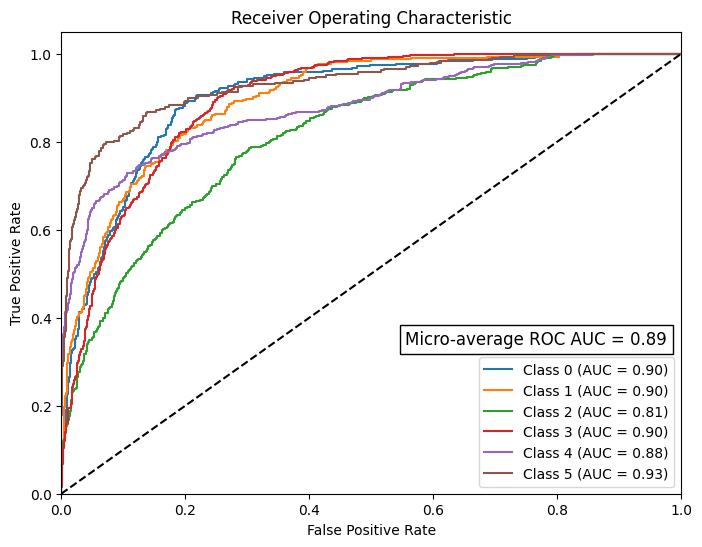

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_true = test_generator.classes
# Binarize the true labels
y_true_binarized = label_binarize(y_true, classes=list(range(len(test_generator.class_indices))))

# Calculate the ROC AUC score for each class
roc_auc_scores = roc_auc_score(y_true_binarized, cnn_y_pred, average='micro')

# Plot the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(test_generator.class_indices)):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], cnn_y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_true_binarized[:, i], cnn_y_pred[:, i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(test_generator.class_indices)):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot the random chance curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Add micro-average ROC AUC score to the plot
plt.text(0.555, 0.34, 'Micro-average ROC AUC = %0.2f' % roc_auc_scores, fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

plt.show()

## ii. ROC-AUC Curve for the Final Ensemble Model

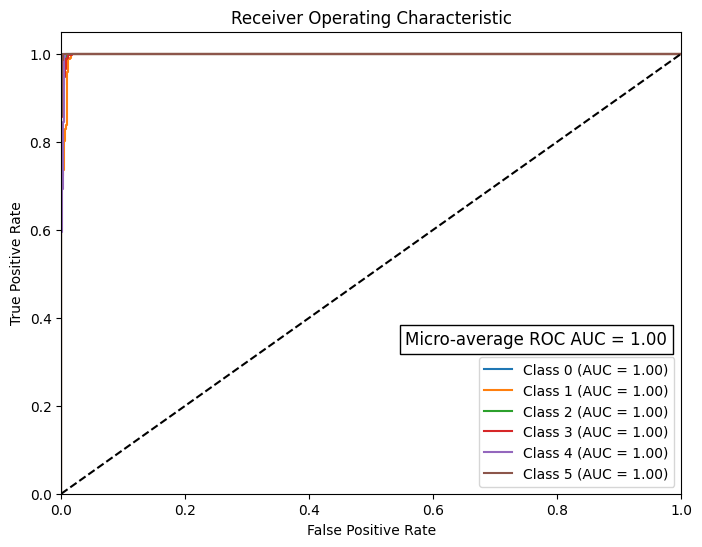

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assume cnn_probs and tabular_probs are the predicted probabilities
# Ensemble (weighted average of CNN and tabular model probabilities)
ensemble_probs = (0.6 * cnn_probs + 0.4 * tabular_probs)

y_true = test_generator.classes

# Binarize the true labels
y_true_binarized = label_binarize(y_true, classes=list(range(len(test_generator.class_indices))))

# Calculate the ROC AUC score for each class
roc_auc_scores = roc_auc_score(y_true_binarized, ensemble_probs, average='micro')

# Plot the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(test_generator.class_indices)):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], ensemble_probs[:, i])
    roc_auc[i] = roc_auc_score(y_true_binarized[:, i], ensemble_probs[:, i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(test_generator.class_indices)):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot the random chance curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Add micro-average ROC AUC score to the plot
plt.text(0.555, 0.34, 'Micro-average ROC AUC = %0.2f' % roc_auc_scores, fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

plt.show()


## 3. Errors

In [19]:
# Ensemble Prediction for Train, Validation, and Test sets

# 1. Training Set
train_cnn_probs = model.predict(train_generator)
train_tabular_probs = clf.predict_proba(X_train)
train_ensemble_probs = (0.6 * train_cnn_probs + 0.4 * train_tabular_probs)
train_pred = np.argmax(train_ensemble_probs, axis=1)

# 2. Validation Set
val_cnn_probs = model.predict(val_generator)
val_tabular_probs = clf.predict_proba(X_val)
val_ensemble_probs = (0.6 * val_cnn_probs + 0.4 * val_tabular_probs)
val_pred = np.argmax(val_ensemble_probs, axis=1)

# 3. Testing Set
test_cnn_probs = model.predict(test_generator)
test_tabular_probs = clf.predict_proba(X_test)
test_ensemble_probs = (0.6 * test_cnn_probs + 0.4 * test_tabular_probs)
test_pred = np.argmax(test_ensemble_probs, axis=1)


# Print the class predictions for each set (train, val, and test)
print("Train Predictions:", train_pred)
print("Validation Predictions:", val_pred)
print("Test Predictions:", test_pred)


245/245 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step
Train Predictions: [2 1 2 ... 4 2 3]
Validation Predictions: [4 5 4 ... 5 3 3]
Test Predictions: [3 3 3 ... 1 1 1]


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix

# Calculate overall MAE and RMSE
train_mae = mean_absolute_error(train_generator.classes, train_pred)
train_rmse = np.sqrt(mean_squared_error(train_generator.classes, train_pred))

val_mae = mean_absolute_error(val_generator.classes, val_pred)
val_rmse = np.sqrt(mean_squared_error(val_generator.classes, val_pred))

test_mae = mean_absolute_error(test_generator.classes, test_pred)
test_rmse = np.sqrt(mean_squared_error(test_generator.classes, test_pred))

print("Overall MAE - Training: {:.4f}".format(train_mae))
print("Overall RMSE - Training: {:.4f}".format(train_rmse))
print("Overall MAE - Validation: {:.4f}".format(val_mae))
print("Overall RMSE - Validation: {:.4f}".format(val_rmse))
print("Overall MAE - Testing: {:.4f}".format(test_mae))
print("Overall RMSE - Testing: {:.4f}".format(test_rmse))

Overall MAE - Training: 0.4365
Overall RMSE - Training: 1.0749
Overall MAE - Validation: 0.4456
Overall RMSE - Validation: 1.1020
Overall MAE - Testing: 0.0355
Overall RMSE - Testing: 0.2467


## 4. ALL Confusion Matrices

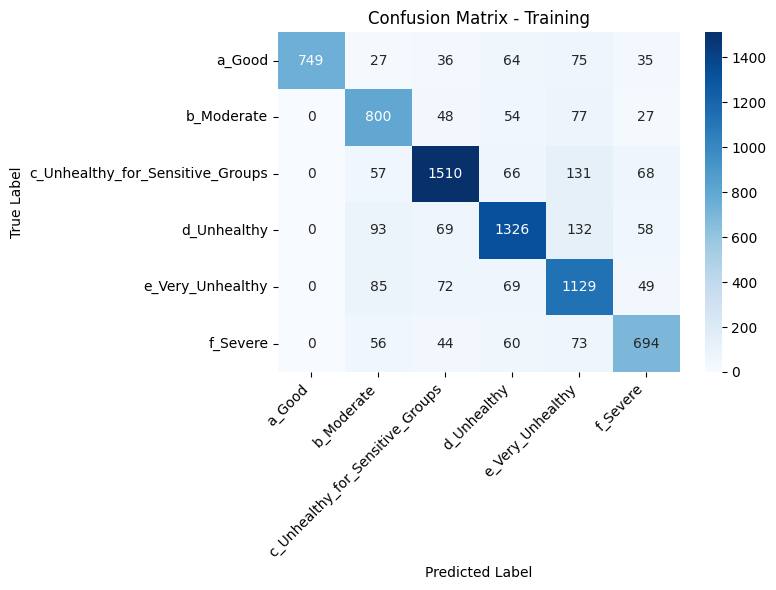

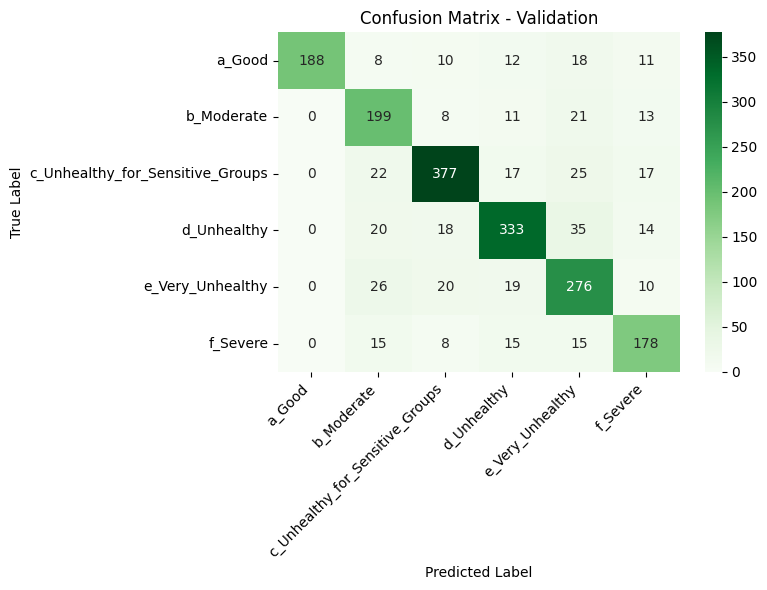

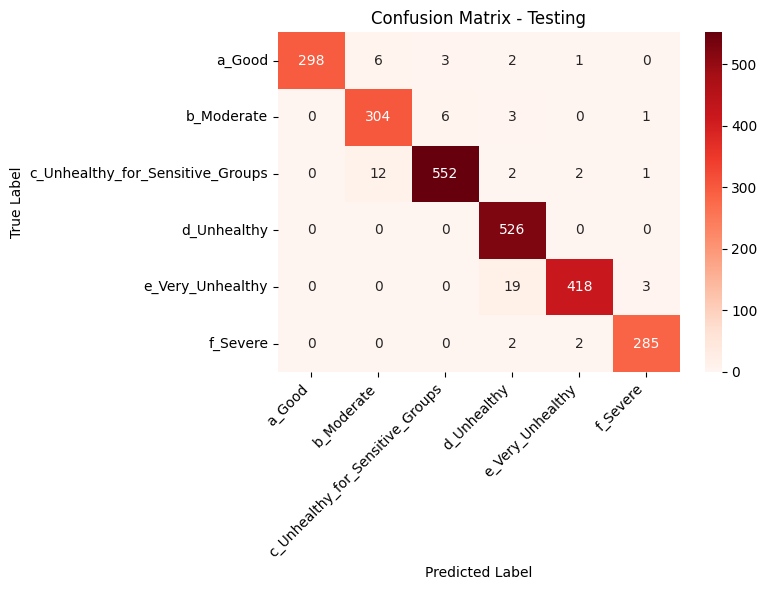

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices for train, validation, and test sets
train_cm = confusion_matrix(train_generator.classes, train_pred)
val_cm = confusion_matrix(val_generator.classes, val_pred)
test_cm = confusion_matrix(test_generator.classes, test_pred)

# Define class labels
class_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Training')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, cmap='Greens', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Validation')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Reds', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Testing')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Finally Completed